In [ ]:
#How to reuse existing weights of CNN and modify ANN(FC) layer as per our custom dataset

In [1]:
import tensorflow as tf

In [2]:
# Extract the Zip File ---- Step required in colab if zip file uploaded

!unzip fruits-small.zip

Archive:  fruits-small.zip
   creating: fruits-small/
   creating: fruits-small/data/
   creating: fruits-small/data/Training/
   creating: fruits-small/data/Training/Banana/
  inflating: fruits-small/data/Training/Banana/0_100.jpg  
  inflating: fruits-small/data/Training/Banana/104_100.jpg  
  inflating: fruits-small/data/Training/Banana/107_100.jpg  
  inflating: fruits-small/data/Training/Banana/10_100.jpg  
  inflating: fruits-small/data/Training/Banana/112_100.jpg  
  inflating: fruits-small/data/Training/Banana/117_100.jpg  
  inflating: fruits-small/data/Training/Banana/118_100.jpg  
  inflating: fruits-small/data/Training/Banana/119_100.jpg  
  inflating: fruits-small/data/Training/Banana/11_100.jpg  
  inflating: fruits-small/data/Training/Banana/120_100.jpg  
  inflating: fruits-small/data/Training/Banana/121_100.jpg  
  inflating: fruits-small/data/Training/Banana/122_100.jpg  
  inflating: fruits-small/data/Training/Banana/123_100.jpg  
  inflating: fruits-small/data/Train

In [3]:
# Preprocessing --- Goal is to make the data compatible for CNN
# Tensorflow by default offers direct class to achieve preprocessing

# ImageGenerators

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [4]:
# Pass my images

trainImageData = train_generator.flow_from_directory('fruits-small/data/Training',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(224,224))

testImageData = test_generator.flow_from_directory('fruits-small/data/Validation',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(224,224))

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.


In [5]:
# Reuse the VGG16 architecture

#include_top=False ------------------> Removing the FC layer of the architecture

vgg1 = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
#lock the weights of Vgg convolution layer

for layer in vgg1.layers:
  layer.trainable=False

In [7]:
#==================NOTE: Only for New Version of tf (tf >= 2.15)================================
# Define the model with an explicit Input layer
input_layer = tf.keras.layers.Input(shape=[224, 224, 3])
x = vgg1(input_layer)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4000, activation="relu")(x)
x = tf.keras.layers.Dense(2000, activation="relu")(x)
output_layer = tf.keras.layers.Dense(7, activation="softmax")(x)

# Create the final model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In Above, dense=7 as there are 7 class labels

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4000)           │   100,356,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     8,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │        14,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,086,695 (469.54 MB)

 Trainable params: 108,372,007 (413.41 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
#Compile
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
model.fit(trainImageData,
          validation_data=testImageData,
          epochs=3,
          steps_per_epoch=int(len(trainImageData.filenames) / trainImageData.batch_size),
          validation_steps=int(len(testImageData.filenames) / testImageData.batch_size))

Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 203ms/step - accuracy: 0.9953 - loss: 0.9203 - val_accuracy: 0.9991 - val_loss: 0.0065
Epoch 2/10
  1/171 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


171/171 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9991 - val_loss: 0.0095
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 31s 183ms/step - accuracy: 1.0000 - loss: 5.1226e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 82s 282m

In [16]:
img = tf.keras.preprocessing.image.load_img('banana.jpg', target_size=(224, 224))

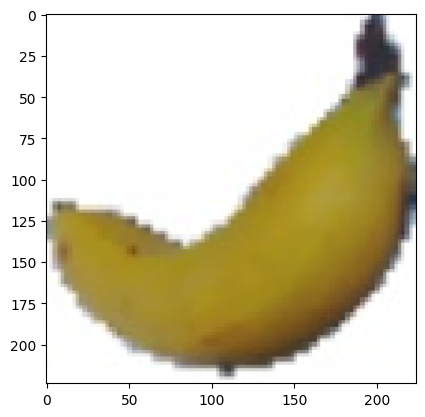

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [18]:
imgArray= tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(224, 224, 3)

In [19]:
import numpy as np
compatibleArray = np.expand_dims(imgArray, axis=0)
compatibleArray.shape

(1, 224, 224, 3)

In [20]:
model.predict(compatibleArray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
trainImageData.class_indices.items()

dict_items([('Banana', 0), ('Lemon', 1), ('Mango', 2), ('Orange', 3), ('Pineapple', 4), ('Pomegranate', 5), ('Strawberry', 6)])

In [22]:
{v:k for k,v in trainImageData.class_indices.items()} [ np.argmax(model.predict(compatibleArray)) ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'Banana'

In [ ]:
# Resnet50
# MobileNet any version
# vgg 19
# Xception

**ResNet50**


**Preprocessing:** ResNet50 requires specific preprocessing, so we use tf.keras.applications.resnet50.preprocess_input.

**Loading the Model:** We load ResNet50 with include_top=False to exclude the original classification layers.

**Freezing Layers:** We freeze the base model layers to prevent them from being updated during training.

**Adding Custom Layers:** We add a global average pooling layer and custom dense layers for classification.

**Compiling and Training:** The compilation and training process is similar to the original code.

In [52]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [53]:
trainImageData = train_generator.flow_from_directory(
    'fruits-small/data/Training',
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224)
)


Found 3425 images belonging to 7 classes.


In [54]:
testImageData = test_generator.flow_from_directory(
    'fruits-small/data/Validation',
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224)
)


Found 1150 images belonging to 7 classes.


In [55]:
# Load ResNet50 without the top classification layer
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [56]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [57]:
#==================NOTE: Only for New Version of tf (tf >= 2.15)================================
# Define the model with an explicit Input layer
input_layer = tf.keras.layers.Input(shape=[224, 224, 3])
x = vgg1(input_layer)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4000, activation="relu")(x)
x = tf.keras.layers.Dense(2000, activation="relu")(x)
output_layer = tf.keras.layers.Dense(7, activation="softmax")(x)

# Create the final model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [58]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4000)           │   100,356,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2000)           │     8,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │        14,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,086,695 (469.54 MB)

 Trainable params: 108,372,007 (413.41 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile and train the model (same as before)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainImageData, validation_data=testImageData, epochs=100, steps_per_epoch=len(trainImageData), validation_steps=len(testImageData))


Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 42s 228ms/step - accuracy: 0.9105 - loss: 24.0480 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 38s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
172/172 ━━━

In [33]:
img = tf.keras.preprocessing.image.load_img('banana.jpg', target_size=(224, 224))

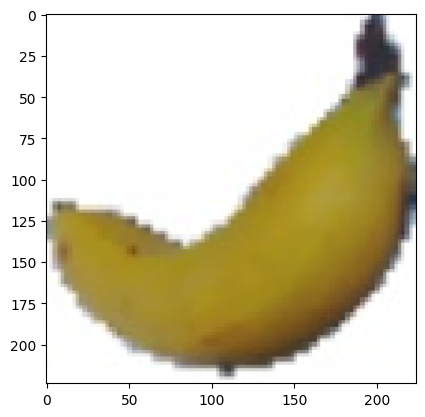

In [34]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [35]:
imgArray= tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(224, 224, 3)

In [36]:
model.predict(compatibleArray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([[1.0000000e+00, 5.2018466e-11, 8.8992078e-12, 1.3193878e-16,
        5.4344559e-17, 7.3977323e-14, 5.6362906e-13]], dtype=float32)

In [37]:
trainImageData.class_indices.items()

dict_items([('Banana', 0), ('Lemon', 1), ('Mango', 2), ('Orange', 3), ('Pineapple', 4), ('Pomegranate', 5), ('Strawberry', 6)])

In [38]:
{v:k for k,v in trainImageData.class_indices.items()} [ np.argmax(model.predict(compatibleArray)) ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'Banana'

**MobileNetV2**

In [44]:
import tensorflow as tf

# Preprocessing
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

trainImageData = train_generator.flow_from_directory(
    'fruits-small/data/Training',
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224)
)

# Create an instance of ImageDataGenerator for testing
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

testImageData = test_datagen.flow_from_directory(
    'fruits-small/data/Validation',
    batch_size=20,
    class_mode='categorical',
    target_size=(224, 224))

# Load MobileNet V2 without the top classification layer
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Add Global Average Pooling
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(7, activation='softmax')(x)  # 7 classes

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainImageData, validation_data=testImageData, epochs=10, steps_per_epoch=len(trainImageData), validation_steps=len(testImageData))

Found 3425 images belonging to 7 classes.
Found 1150 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/172 ━━━━━━━━━━━━━━━━━━━━ 26s 96ms/step - accuracy: 0.9517 - loss: 0.1334 - val_accuracy: 1.0000 - val_loss: 4.3804e-05
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 1.0000 - loss: 1.6953e-05 - val_accuracy: 1.0000 - val_loss: 2.6245e-05
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 1.0000 - loss: 7.5014e-06 - val_accuracy: 1.0000 - val_loss: 1.0661e-05
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 1.0000 - loss: 2.8998e-06 - val_accuracy: 1.0000 - val_loss: 6.0794e-06
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 1.0000 - loss: 1.6901e-06 - val_accuracy: 1.0000 - val_loss: 4.2839e-06
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 1.0000 - loss: 1.0591e-06 - val_accuracy: 1.0000 - val_loss: 2.9274e-06
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 1.0000 - loss: 6.3420e-07 - val_accuracy: 1.0000 - val_loss: 2.3352e-06
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step

In [45]:
img = tf.keras.preprocessing.image.load_img('banana.jpg', target_size=(224, 224))

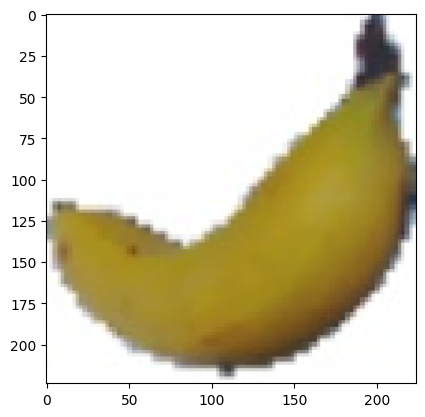

In [46]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [47]:
imgArray= tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(224, 224, 3)

In [48]:
model.predict(compatibleArray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[9.98900414e-01, 5.67285809e-08, 1.30508473e-04, 2.48896013e-05,
        3.72810842e-04, 1.08669816e-07, 5.71219600e-04]], dtype=float32)

In [50]:
trainImageData.class_indices.items()

dict_items([('Banana', 0), ('Lemon', 1), ('Mango', 2), ('Orange', 3), ('Pineapple', 4), ('Pomegranate', 5), ('Strawberry', 6)])

In [49]:
{v:k for k,v in trainImageData.class_indices.items()} [ np.argmax(model.predict(compatibleArray)) ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Banana'